In [2]:
## Dynamic Light Scattering ##

## Data Analysis Process (Version 2.0) ##

## D.Sapalidis, Zurich, Switzerland, 30.06.2024 ##

## Part I: Excel sheets separation from the single .xlsx raw data from ZetaSizer to .csv files ##

import os
import pandas as pd
import pathlib
import matplotlib.pyplot as plt


def excel_to_csv_folder(input_folder, output_folder):
    
    files = os.listdir(input_folder)
    
    
    excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
    
    # Loop through each Excel file
    for excel_file in excel_files:
        
        excel_path = os.path.join(input_folder, excel_file)
        
        
        xls = pd.ExcelFile(excel_path)
        
        # Loop through each sheet and convert to CSV
        for sheet_name in xls.sheet_names:
            
            df = pd.read_excel(excel_path, sheet_name=sheet_name)
            
            csv_filename = f"PhD-Empa-MetrINo-DLS-{sheet_name}.csv"
            
            output_csv_file = os.path.join(output_folder, csv_filename)
            
            df.to_csv(output_csv_file, index=False)
            
            print(f"Converted sheet '{sheet_name}' from '{excel_file}' to CSV: {output_csv_file}")
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# User Defined Paths:
input_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting\UCNPs_FBS_Fitting_DLS"
output_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting\UCNPs_FBS_Fitting_DLS"

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

input_folder = pathlib.PureWindowsPath(input_folder).as_posix()
output_folder = pathlib.PureWindowsPath(output_folder).as_posix()

excel_to_csv_folder(input_folder, output_folder)


Converted sheet 'A1H1_FBS_All_no_Correlogram' from 'D.Sapalidis-PhD-Empa-MetrINo-Metr28-DLS-UCNPs-FBS-Correlogram.xlsx' to CSV: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\PhD-Empa-MetrINo-DLS-A1H1_FBS_All_no_Correlogram.csv
Converted sheet 'B2H1_FBS_All_no_Correlogram' from 'D.Sapalidis-PhD-Empa-MetrINo-Metr28-DLS-UCNPs-FBS-Correlogram.xlsx' to CSV: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\PhD-Empa-MetrINo-DLS-B2H1_FBS_All_no_Correlogram.csv
Converted sheet 'A1H1_FBS_All_son_Correlogram' from 'D.Sapalidis-PhD-Empa-MetrINo-Metr28-DLS-UCNPs-FBS-Correlogram.xlsx' to CSV: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\PhD-Empa-MetrINo-DLS-A1H1_FBS_All_son_Correlogram.csv
Converted sheet 'B2H1_FBS_All_son_Correlogram' from 'D.Sapalidis-PhD-Empa-MetrINo-Metr28-DLS-UCNPs-FBS-Correlogram.xlsx' to CSV: C:/Users/Di

In [3]:
## Dynamic Light Scattering ##

## Data Analysis Process (Version 2.0) ##

## Empa, Center for X-ray Analytics, D.Sapalidis, St. Gallen, Switzerland, 02.07.2024 ##

## Part II: Data sets generation for each angle and sample ##

import os
import pandas as pd
import pathlib

def process_dls_file(file_path, angles):

    df = pd.read_csv(file_path, delimiter=',', header=0, nrows=None)
    
    num_columns_per_angle = 2 * angles
    
    dataset_index = 1
    
    # Loop through the dataframe and split it based on the number of angles
    for start_col in range(0, df.shape[1], num_columns_per_angle):
        
        # Select a subset of columns
        subset_df = df.iloc[:, start_col:start_col + num_columns_per_angle]
        
        # Extract the sample name from the first column header
        full_header = df.columns[start_col]
        sample_name = full_header.split('Time (µs) -')[-1].split('[Steady state]')[0].strip()
        
        # Output file name
        output_file_name = f"{sample_name}_dataset.txt"
        output_file_path = os.path.join(os.path.dirname(file_path), output_file_name)
        
        # Save to a .txt file
        subset_df.to_csv(output_file_path, index=False, sep=',')
        print(f"Saved: {output_file_path}")
        
        dataset_index += 1

def process_dls_folder(folder_path, angles):

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            process_dls_file(file_path, angles)
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# User-defined number of angles and paths
angles = 3  # For multi-angle DLS >1

input_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting\UCNPs_FBS_Fitting_DLS"

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

input_folder = pathlib.PureWindowsPath(input_folder).as_posix()

process_dls_folder(input_folder, angles)


Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_5_no_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_25_no_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_125_no_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_0625_no_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_5_son_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_25_son_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_125_son_dataset.txt
Saved: C

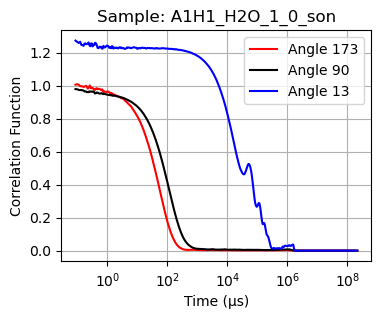

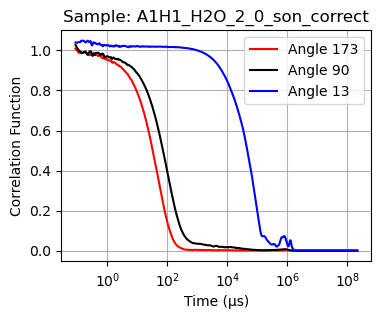

In [4]:
## Dynamic Light Scattering ##

## Data Analysis Process (Version 2.0) ##

## Empa, Center for X-ray Analytics, D.Sapalidis, St. Gallen, Switzerland, 02.07.2024 ##

## Part III: Plotting all the angles of each sample into a single graph ##

import os
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

def plot_dls_data_from_txt(file_path, angles, angle_values):
    
    df = pd.read_csv(file_path, delimiter=',', header=0, nrows=None)
    
    sample_name = os.path.basename(file_path).replace('_dataset.txt', '')
    
    colors = ['red', 'black', 'blue', 'green', 'orange', 'purple', 'yellow', 'gray']
    
    # Create a plot for the sample
    plt.figure(figsize=(4, 3))  
    
    for i in range(angles):
        time_col = df.columns[2 * i]
        corr_col = df.columns[2 * i + 1]
        
        plt.semilogx(df[time_col], df[corr_col], label=f'Angle {angle_values[i]}', color=colors[i])
    
    plt.title(f'Sample: {sample_name}')
    plt.xlabel('Time (µs)')
    plt.ylabel('Correlation Function')
    plt.legend()
    plt.grid(True)
    plt.show()

def process_plots_folder(folder_path, angles, angle_values):

    for file_name in os.listdir(folder_path):
        if file_name.endswith('_dataset.txt'):
            file_path = os.path.join(folder_path, file_name)
            plot_dls_data_from_txt(file_path, angles, angle_values)
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# User-defined number of angles and paths
angles = 3  
angle_1 = 173
angle_2 = 90
angle_3 = 13
angle_values = [angle_1, angle_2, angle_3]

input_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting\UCNPs_H2O_Fitting_DLS"

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

input_folder = pathlib.PureWindowsPath(input_folder).as_posix()

process_plots_folder(input_folder, angles, angle_values)

In [ ]:
## Dynamic Light Scattering ##

## Data Analysis Process (Version 2.0) ##

## Empa, Center for X-ray Analytics, D.Sapalidis, St. Gallen, Switzerland, 04.07.2024 ##

## Part IV:Fitting of the DLS data ##

import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties.umath import *
import json

# Define function to normalize Y-axis
def normalize_y(df):
    for col in df.columns[1::2]:  # Every second column starting from index 1
        mean_first_six = df[col].iloc[:6].mean()
        df[col] = df[col] / mean_first_six
    return df

# Define function to convert X-axis to milliseconds
def convert_to_milliseconds(df):
    for col in df.columns[::2]:  # Every second column starting from index 0
        df[col] = df[col] / 1000
    return df

# Define Cumulants fitting function
def cumulantDLS(xdata, a, b, c, d):
    return a + b * (np.exp(-c * xdata) * (1 + 0.5 * d * xdata**2))**2  # Alastair G. Mailer et al 2015 J. Phys.: Condens. Matter 27 145102 - Equation 13

# Define Biexponential fitting function
def biexponential(xdata, e, f, g, h, i):
    return e + (f * np.exp(-g * xdata) + h * np.exp(-i * xdata))**2

# Diffusion coefficient
def calculate_diffusion_coefficient_and_uncertainty(x2, x2_err, angle):
    q_sq = (((4 * np.pi * refr_Index / lambda_val) * np.sin((angle * np.pi / 180) / 2))**2)  # q_square in nm^(-1)
    diff_coeff = 10**(-6) * x2 / q_sq  # diffusion coefficient in  μm^(2) / ms
    diff_coeff_err = 10**(-6) * x2_err / q_sq
    return diff_coeff, diff_coeff_err, q_sq

# Hydrodynamic diameter
def calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff, diff_coeff_err):
    d_h = (10**9 * 10**9 * k_Boltzman * Temp_K) / (3 * np.pi * viscosity * diff_coeff)  # d_h in nm
    d_h_err = (10**9 * 10**9 * k_Boltzman * Temp_K) / (3 * np.pi * viscosity) * (diff_coeff_err / diff_coeff**2)
    return d_h, d_h_err

# Format numbers with uncertainties to one significant digit
def format_with_uncertainty(value, error):
    u_val = ufloat(value, error)
    return f"{u_val:.1uP}"

# Print results
def print_results(results_list):
    for result in results_list:
        print(result)
        print()
        
# Fitting of the data
def process_dls_file(file_path, angles, angle_values, angles_for_average, fitmodel):
    results_list = []
    
    df = pd.read_csv(file_path, delimiter=',', header=0, nrows=None)
    
    df_normalized = normalize_y(df)
    
    df_normalized_ms = convert_to_milliseconds(df_normalized)
    
    # Initialize arrays to store fitting results
    F_fit = np.zeros((angles, len(df_normalized)))
    X_fit = np.zeros((angles, len(df_normalized), 5 if fitmodel == 2 else 4))
    Residuals = np.zeros((angles, len(df_normalized)))
    Errors = np.zeros((angles, 5 if fitmodel == 2 else 4))  # To store uncertainties
    
    # Initialize lists to store results for selected angles
    diff_coeff1_list = []
    diff_coeff1_err_list = []
    diff_coeff2_list = []
    diff_coeff2_err_list = []
    d_h1_list = []
    d_h1_err_list = []
    d_h2_list = []
    d_h2_err_list = []
    
    gamma1_values = []
    gamma2_values = []
    q_square_values1 = []
    q_square_values2 = []
    
    sample_name = os.path.basename(file_path).replace("_dataset.txt", "")
    
    # Perform fitting for each angle
    for idx in range(angles):
        xdata = df_normalized_ms.iloc[:, 2 * idx].values
        ydata = df_normalized_ms.iloc[:, 2 * idx + 1].values
        
        if fitmodel == 1:
            # Cumulants fitting
            x0_g = [0.0, 1.0, 1.0, 0.1]  # Initial guesses for fitting parameters
            boundaries = ([-0.2, 0.0, 0.0, 0.0], [0.2, 1.0, np.inf, 1.0])  # Limits for the parameters
            x, cov = curve_fit(cumulantDLS, xdata, ydata, p0=x0_g, bounds=boundaries)

        elif fitmodel == 2:
            # Biexponential fitting
            x0_g = [0.0, 0.5, 1.0, 0.5, 1.0]  # Initial guesses for fitting parameters
            boundaries = ([-0.2, 0.0, 0.0, 0.0, 0.0], [0.2, 1.0, np.inf, 1.0, np.inf])  # Limits for the parameters
            x, cov = curve_fit(biexponential, xdata, ydata, p0=x0_g, bounds=boundaries)
        
        errors = np.sqrt(np.diag(cov))  # Uncertainties of the fitting parameters
        F_fit[idx] = cumulantDLS(xdata, *x) if fitmodel == 1 else biexponential(xdata, *x)
        X_fit[idx] = x
        Residuals[idx] = ydata - F_fit[idx]
        Errors[idx] = errors
        chi_square = np.sum(((ydata - F_fit[idx]) ** 2) / F_fit[idx])
        reduced_chi_square = chi_square / (len(ydata) - len(x))
        
        if fitmodel == 1:
            # Calculate diffusion coefficient for cumulants
            diff_coeff, diff_coeff_err, q_sq = calculate_diffusion_coefficient_and_uncertainty(x[2], errors[2], angle_values[idx])
            gamma1_values.append(x[2])
            q_square_values1.append(q_sq)
            
        elif fitmodel == 2:
            # Calculate diffusion coefficients for biexponential
            diff_coeff1, diff_coeff1_err, q_sq1 = calculate_diffusion_coefficient_and_uncertainty(x[2], errors[2], angle_values[idx])
            diff_coeff2, diff_coeff2_err, q_sq2 = calculate_diffusion_coefficient_and_uncertainty(x[4], errors[4], angle_values[idx])
            gamma1_values.append(x[2])
            gamma2_values.append(x[4])
            q_square_values1.append(q_sq1)
            q_square_values2.append(q_sq2)
        
        # Calculate hydrodynamic diameter
        if fitmodel == 1:
            hydrodynamic_diameter, hydrodynamic_diameter_err = calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff, diff_coeff_err)
        elif fitmodel == 2:
            hydrodynamic_diameter1, hydrodynamic_diameter1_err = calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff1, diff_coeff1_err)
            hydrodynamic_diameter2, hydrodynamic_diameter2_err = calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff2, diff_coeff2_err)
        
        # Store results if the angle is in the angles_for_average list
        if angle_values[idx] in angles_for_average:
            if fitmodel == 1:
                diff_coeff1_list.append(ufloat(diff_coeff, diff_coeff_err))
                d_h1_list.append(ufloat(hydrodynamic_diameter, hydrodynamic_diameter_err))
            elif fitmodel == 2:
                diff_coeff1_list.append(ufloat(diff_coeff1, diff_coeff1_err))
                diff_coeff2_list.append(ufloat(diff_coeff2, diff_coeff2_err))
                d_h1_list.append(ufloat(hydrodynamic_diameter1, hydrodynamic_diameter1_err))
                d_h2_list.append(ufloat(hydrodynamic_diameter2, hydrodynamic_diameter2_err))
        # Save fitting data to file
        if save_fitting_data == "yes":
            save_fitting_data_to_file(file_path, sample_name, angle_values[idx], xdata, ydata, F_fit[idx], Residuals[idx])
            
        # Collect results
        if fitmodel == 1:
            results_list.append({
                "Sample": os.path.basename(file_path).replace("_dataset.txt", ""),
                "Angle": angle_values[idx],
                "q^2": q_sq,
                "B-1": x[0],
                "Δ(Β-1)": errors[0],
                "β": x[1],
                "Δ(β)": errors[1],
                "Γ": x[2],
                "Δ(Γ)": errors[2],
                "PDI": x[3] / (x[2]**2),
                "Δ(PDI)": errors[3]/(x[2]**2),
                "Diffusion Coefficient": diff_coeff,
                "Δ(Diffusion Coefficient)": diff_coeff_err,
                "Hydrodynamic Diameter": hydrodynamic_diameter,
                "Δ(Hydrodynamic Diameter)": hydrodynamic_diameter_err,
                "χ^2": chi_square,
                "Reduced χ^2": reduced_chi_square
            })
        else: 
            results_list.append({
                "Sample": os.path.basename(file_path).replace("_dataset.txt", ""),
                "Angle": angle_values[idx],
                "q^2 (Γ1)": q_sq1,
                "q^2 (Γ2)": q_sq2,
                "B-1": x[0],
                "Δ(B-1)": errors[0],
                "A1": x[1],
                "Δ(A1)": errors[1],
                "Γ1": x[2],
                "Δ(Γ1)": errors[2],
                "A2": x[3],
                "Δ(A2)": errors[3],
                "Γ2": x[4],
                "Δ(Γ2)": errors[4],
                "Diffusion Coefficient 1": diff_coeff1,
                "Δ(Diffusion Coefficient 1)": diff_coeff1_err,
                "Diffusion Coefficient 2": diff_coeff2,
                "Δ(Diffusion Coefficient 2)": diff_coeff2_err,
                "Hydrodynamic Diameter 1": hydrodynamic_diameter1,
                "Δ(Hydrodynamic Diameter 1)": hydrodynamic_diameter1_err,
                "Hydrodynamic Diameter 2": hydrodynamic_diameter2,
                "Δ(Hydrodynamic Diameter 2)": hydrodynamic_diameter2_err,
                "χ^2": chi_square,
                "Reduced χ^2": reduced_chi_square
            })        
        
        # Plot experimental and fitted curves
        plt.figure(figsize=(6, 4))
        plt.semilogx(xdata, ydata, 'ko', label='Experimental Data')
        plt.semilogx(xdata, F_fit[idx], 'r-', label='Fitted Curve')
        plt.title(f'Sample: {os.path.basename(file_path).replace("_dataset.txt", "")}, Angle: {angle_values[idx]}')
        plt.xlabel('Time (ms)')
        plt.ylabel('Normalized Correlation Function')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Print fitting parameters with uncertainties
        print(f'Sample {os.path.basename(file_path).replace("_dataset.txt", "")}')
        print(f"Angle {angle_values[idx]}:")
        print(f"q^2: {q_sq1 if fitmodel == 2 else q_sq}")
        
        if fitmodel == 1:
            print(f"Β-1: {format_with_uncertainty(x[0], errors[0])}, β: {format_with_uncertainty(x[1], errors[1])}, Γ: {format_with_uncertainty(x[2], errors[2])}, PDI: {format_with_uncertainty(x[3]/(x[2]**2), errors[3]/(x[2]**2))}")
            print(f"Diffusion Coefficient: {format_with_uncertainty(diff_coeff, diff_coeff_err)} μm2/ms")
            print(f"Hydrodynamic Diameter: {format_with_uncertainty(hydrodynamic_diameter, hydrodynamic_diameter_err)} nm")
        elif fitmodel == 2:
            print(f"Β-1: {format_with_uncertainty(x[0], errors[0])}, A1: {format_with_uncertainty(x[1], errors[1])}, Γ1: {format_with_uncertainty(x[2], errors[2])}, A2: {format_with_uncertainty(x[3], errors[3])}, Γ2: {format_with_uncertainty(x[4], errors[4])}")
            print(f"Diffusion Coefficient 1: {format_with_uncertainty(diff_coeff1, diff_coeff1_err)} μm2/ms")
            print(f"Diffusion Coefficient 2: {format_with_uncertainty(diff_coeff2, diff_coeff2_err)} μm2/ms")
            print(f"Hydrodynamic Diameter 1: {format_with_uncertainty(hydrodynamic_diameter1, hydrodynamic_diameter1_err)} nm")
            print(f"Hydrodynamic Diameter 2: {format_with_uncertainty(hydrodynamic_diameter2, hydrodynamic_diameter2_err)} nm")
    
    
    # Plot Γ1 vs q^2 for selected angles
    if diff_coeff1_list and d_h1_list:
        plot_gamma_vs_q_square(gamma1_values, q_square_values1, angles_for_average, 'Γ1 vs q^2 Plot')
    
    # Plot Γ2 vs q^2 for selected angles if model 2
    if fitmodel == 2 and diff_coeff2_list and d_h2_list:
        plot_gamma_vs_q_square(gamma2_values, q_square_values2, angles_for_average, 'Γ2 vs q^2 Plot')
    
    # Calculate averages
    if diff_coeff1_list and d_h1_list and (fitmodel == 1 or diff_coeff2_list):
        avg_diff_coeff1 = np.mean(diff_coeff1_list)
        avg_diff_coeff2 = np.mean(diff_coeff2_list) if diff_coeff2_list else None
        avg_d_h1 = np.mean(d_h1_list)
        avg_d_h2 = np.mean(d_h2_list) if d_h2_list else None
        
        print(f"\nAveraged Results for angles {angles_for_average}:")
        print(f"Average Diffusion Coefficient 1: {avg_diff_coeff1:.1uP} μm2/ms")
        if avg_diff_coeff2:
            print(f"Average Diffusion Coefficient 2: {avg_diff_coeff2:.1uP} μm2/ms")
        print(f"Average Hydrodynamic Diameter 1: {avg_d_h1:.1uP} nm")
        if avg_d_h2:
            print(f"Average Hydrodynamic Diameter 2: {avg_d_h2:.1uP} nm")
    
    return results_list, F_fit, X_fit, Residuals, Errors, gamma1_values, gamma2_values, q_square_values1, q_square_values2

    
# Plot Γ vs q^2 with linear fitting passing through (0,0)
def plot_gamma_vs_q_square(gamma_values, q_square_values, angles_for_average, plot_title):
    
    angles_indices = [angle_values.index(angle) for angle in angles_for_average]
    q_square_values_selected = np.array([q_square_values[idx] for idx in angles_indices])
    gamma_values_selected = np.array([gamma_values[idx] for idx in angles_indices])
    
    def linear_fit_through_origin(x, m):
        return m * x
    
    popt, _ = curve_fit(linear_fit_through_origin, q_square_values_selected, gamma_values_selected)
    
    # Plot data and linear fit 
    plt.figure(figsize=(6, 4))
    plt.plot(q_square_values_selected, gamma_values_selected, 'ko', label='Γ vs q^2')
    
    # Calculate the y-values of the linear fit at q^2 = 0 and q^2 = max(q_square_values_selected)
    y_fit_at_zero = linear_fit_through_origin(0, *popt)
    y_fit_at_max = linear_fit_through_origin(max(q_square_values_selected), *popt)
    

    plt.plot([0, max(q_square_values_selected)], [y_fit_at_zero, y_fit_at_max], 'r-', label=f'Linear Fit: m={popt[0]:.2e}')  # Linear fit through (0,0)
    plt.plot([0], [0], 'ko')  # Plot (0,0) point 
    
    plt.xlabel('q^2 (nm^(-2))')
    plt.ylabel('Γ (ms^(-1))')
    plt.title(plot_title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Save the data

# Conversion of Greek characters to English
greek_to_english = {
    "\u0393": "Gamma",
    "\u0394": "Delta",
    "\u03b2": "Beta",
    "\u03c7": "Chi"
}

def convert_greek_to_english(results_list):
    converted_results = []
    for entry in results_list:
        converted_entry = {}
        for key, value in entry.items():
            converted_key = "".join(greek_to_english.get(char, char) for char in key)
            converted_entry[converted_key] = value
        converted_results.append(converted_entry)
    return converted_results

# Save fitting data to file
def save_fitting_data_to_file(input_folder, sample_name, angle, xdata, ydata, F_fit, residuals):
    output_file = f"{sample_name}_angle_{angle}_output_fit.txt"
    with open(output_file, 'w') as f:
        f.write("Time (ms),Experimental g(2)-1,Fitting g(2)-1,Residuals\n")
        for t, y_exp, y_fit, res in zip(xdata, ydata, F_fit, residuals):
            f.write(f"{t},{y_exp},{y_fit},{res}\n")
            
def save_results_to_dat(results_list, output_file):
    converted_results = convert_greek_to_english(results_list)
    if not converted_results:
        print("No results to save.")
        return
    
    # Extract headers
    headers = list(converted_results[0].keys())
    
    with open(output_file, 'w', encoding='utf-8') as f:
        # Write headers
        f.write(",".join(headers) + "\n")
        
        # Write data
        for entry in converted_results:
            values = [str(entry[header]) for header in headers]
            f.write(",".join(values) + "\n")

# Processing of all files in the folder
def process_plots_folder(folder_path, angles, angle_values, angles_for_average, fitmodel):
    results_list = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('_dataset.txt'):
            file_path = os.path.join(folder_path, file_name)
            results, _, _, _, _, gamma1_values, gamma2_values, q_square_values1, q_square_values2 = process_dls_file(file_path, angles, angle_values, angles_for_average, fitmodel)
            results_list.extend(results)
    
    output_file = "DLS_Fitting_Data_Output.dat"
    save_results_to_dat(results_list, output_file)
    print_results(results_list)  
        
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# User-defined parameters
angles = 3  # angle number
angle_values = [173, 90, 13]  # angle values
lambda_val = 633  # source wavelength in nm
refr_Index = 1.3329  # solvent refractive index
k_Boltzman = 1.38065e-23  # J*K ^ (-1)
temperature = 25  # in Celsius
viscosity = 0.887e-3  # in Pa*s  (water at 25 oC)
Temp_K = temperature + 273
fitmodel = 2  # 1: Cumulants non-linear, 2: Biexponential
angles_for_average = [173, 90]  # angles for averaging
save_fitting_data = "yes" # (yes/no) save the experimental correlation function [g(2)-1] with the fitting curve for each sample and angle

input_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting\UCNPs_SBM_pr_Fitting_DLS\no_SBM_pr"

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

input_folder = pathlib.PureWindowsPath(input_folder).as_posix()

process_plots_folder(input_folder, angles, angle_values, angles_for_average, fitmodel)

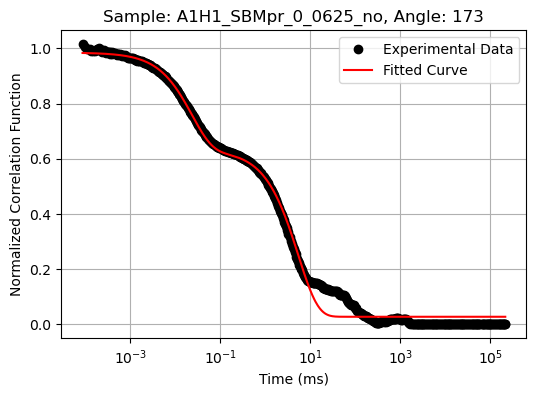

Sample A1H1_SBMpr_0_0625_no
Angle 173:
q^2: 0.0006975668562837355
Β-1: 0.027±0.002, A1: 0.778±0.003, Γ1: 0.092±0.002, A2: 0.201±0.003, Γ2: 39±2
Diffusion Coefficient 1: 0.000132±0.000003 μm2/ms
Diffusion Coefficient 2: 0.056±0.003 μm2/ms
Hydrodynamic Diameter 1: (3.7±0.1)×10³ nm
Hydrodynamic Diameter 2: 8.7±0.4 nm


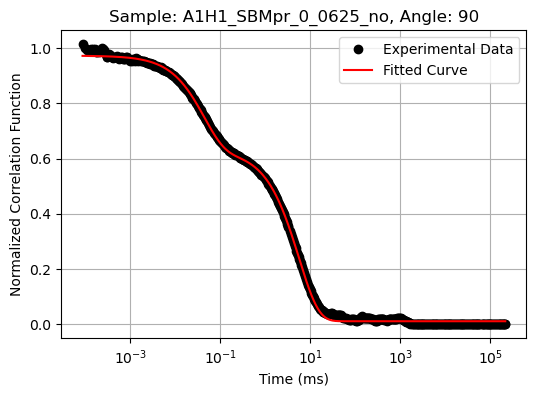

Sample A1H1_SBMpr_0_0625_no
Angle 90:
q^2: 0.0003500881802457264
Β-1: 0.0104±0.0007, A1: 0.787±0.001, Γ1: 0.0883±0.0008, A2: 0.194±0.001, Γ2: 21.2±0.4
Diffusion Coefficient 1: 0.000252±0.000002 μm2/ms
Diffusion Coefficient 2: 0.061±0.001 μm2/ms
Hydrodynamic Diameter 1: (1.95±0.02)×10³ nm
Hydrodynamic Diameter 2: 8.1±0.1 nm


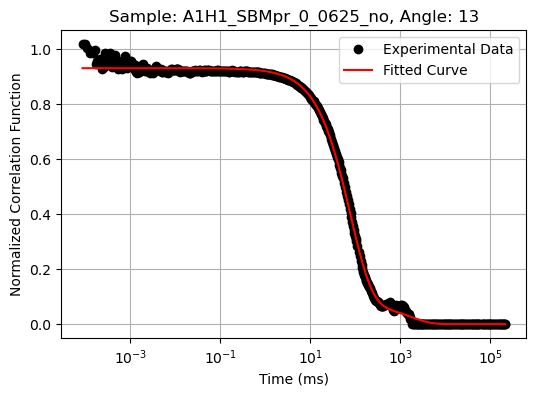

Sample A1H1_SBMpr_0_0625_no
Angle 13:
q^2: 8.97273737915286e-06
Β-1: -0.001±0.002, A1: 0.27±0.01, Γ1: 0.00028±0.00005, A2: 0.70±0.01, Γ2: 0.0081±0.0002
Diffusion Coefficient 1: (3.2±0.5)×10⁻⁵ μm2/ms
Diffusion Coefficient 2: 0.00090±0.00002 μm2/ms
Hydrodynamic Diameter 1: (1.6±0.3)×10⁴ nm
Hydrodynamic Diameter 2: (5.5±0.1)×10² nm


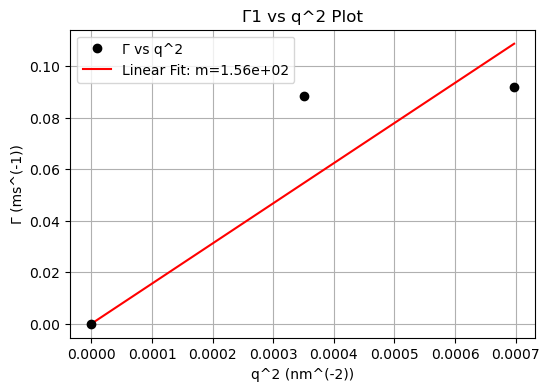

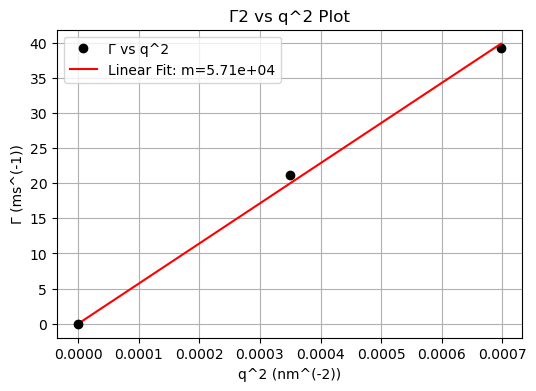


Averaged Results for angles [173, 90]:
Average Diffusion Coefficient 1: 0.000192±0.000002 μm2/ms
Average Diffusion Coefficient 2: 0.058±0.002 μm2/ms
Average Hydrodynamic Diameter 1: (2.84±0.05)×10³ nm
Average Hydrodynamic Diameter 2: 8.4±0.2 nm


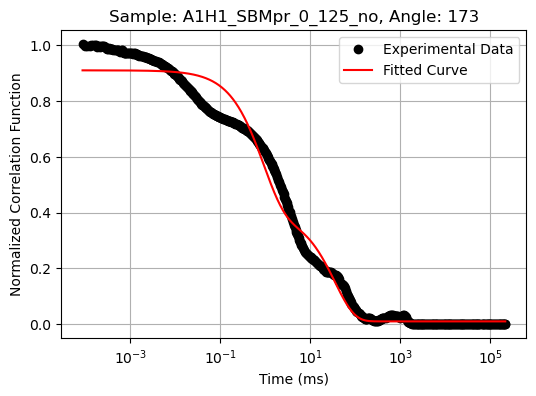

Sample A1H1_SBMpr_0_125_no
Angle 173:
q^2: 0.0006975668562837355
Β-1: 0.010±0.004, A1: 0.62±0.01, Γ1: 0.014±0.001, A2: 0.33±0.01, Γ2: 0.94±0.07
Diffusion Coefficient 1: (2.0±0.2)×10⁻⁵ μm2/ms
Diffusion Coefficient 2: 0.0014±0.0001 μm2/ms
Hydrodynamic Diameter 1: (2.4±0.2)×10⁴ nm
Hydrodynamic Diameter 2: (3.6±0.3)×10² nm


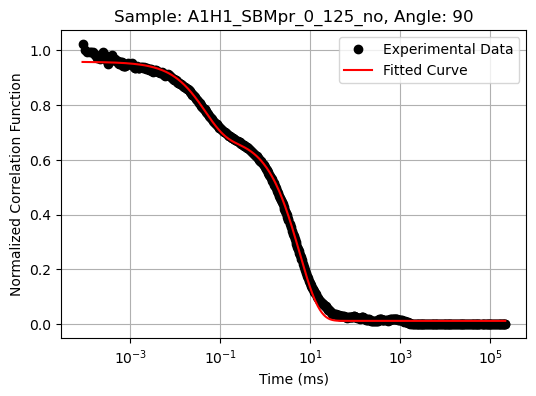

Sample A1H1_SBMpr_0_125_no
Angle 90:
q^2: 0.0003500881802457264
Β-1: 0.0119±0.0009, A1: 0.820±0.001, Γ1: 0.086±0.001, A2: 0.153±0.002, Γ2: 20.8±0.6
Diffusion Coefficient 1: 0.000245±0.000003 μm2/ms
Diffusion Coefficient 2: 0.059±0.002 μm2/ms
Hydrodynamic Diameter 1: (2.01±0.02)×10³ nm
Hydrodynamic Diameter 2: 8.3±0.2 nm


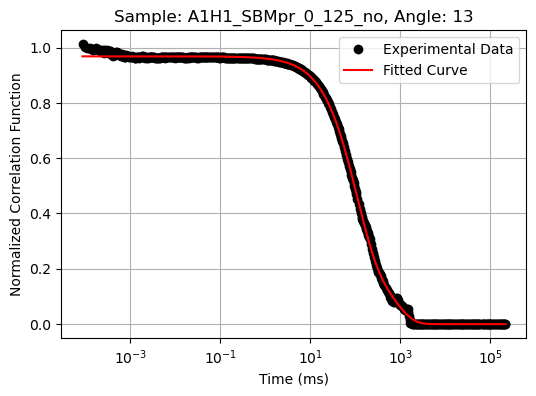

Sample A1H1_SBMpr_0_125_no
Angle 13:
q^2: 8.97273737915286e-06
Β-1: -0.0006±0.0008, A1: 0.500±0.009, Γ1: 0.00070±0.00003, A2: 0.484±0.009, Γ2: 0.0073±0.0001
Diffusion Coefficient 1: (7.9±0.3)×10⁻⁵ μm2/ms
Diffusion Coefficient 2: 0.00082±0.00002 μm2/ms
Hydrodynamic Diameter 1: (6.3±0.3)×10³ nm
Hydrodynamic Diameter 2: (6.0±0.1)×10² nm


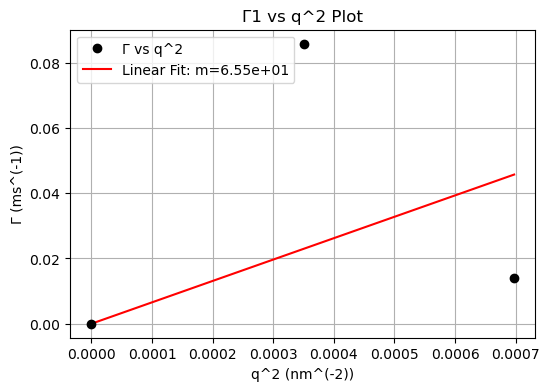

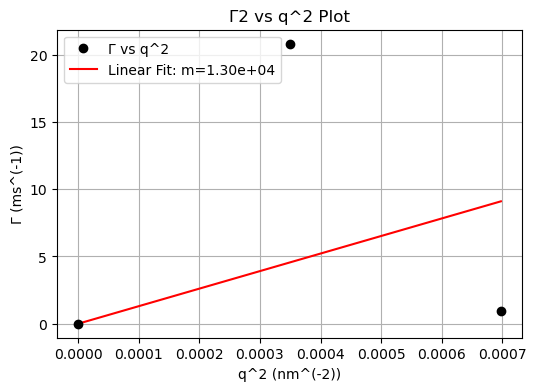


Averaged Results for angles [173, 90]:
Average Diffusion Coefficient 1: 0.000133±0.000002 μm2/ms
Average Diffusion Coefficient 2: 0.0304±0.0009 μm2/ms
Average Hydrodynamic Diameter 1: (1.3±0.1)×10⁴ nm
Average Hydrodynamic Diameter 2: (1.9±0.1)×10² nm


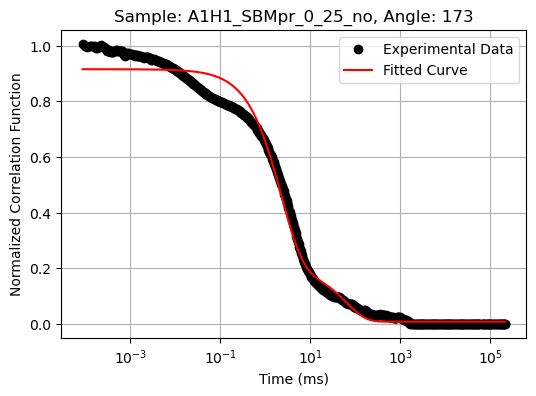

Sample A1H1_SBMpr_0_25_no
Angle 173:
q^2: 0.0006975668562837355
Β-1: 0.009±0.003, A1: 0.44±0.02, Γ1: 0.008±0.001, A2: 0.52±0.02, Γ2: 0.33±0.02
Diffusion Coefficient 1: (1.1±0.2)×10⁻⁵ μm2/ms
Diffusion Coefficient 2: 0.00047±0.00002 μm2/ms
Hydrodynamic Diameter 1: (4.3±0.6)×10⁴ nm
Hydrodynamic Diameter 2: (1.05±0.05)×10³ nm


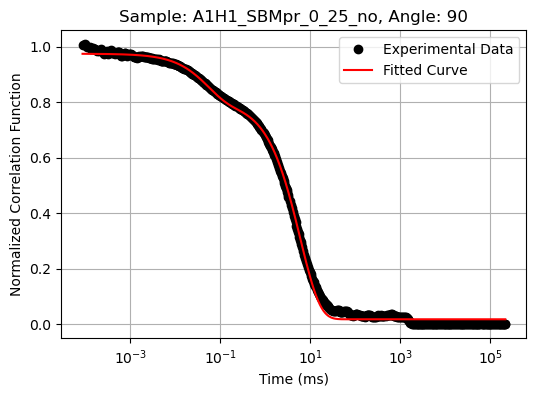

Sample A1H1_SBMpr_0_25_no
Angle 90:
q^2: 0.0003500881802457264
Β-1: 0.017±0.001, A1: 0.886±0.001, Γ1: 0.0825±0.0009, A2: 0.092±0.002, Γ2: 18.6±0.9
Diffusion Coefficient 1: 0.000236±0.000002 μm2/ms
Diffusion Coefficient 2: 0.053±0.003 μm2/ms
Hydrodynamic Diameter 1: (2.09±0.02)×10³ nm
Hydrodynamic Diameter 2: 9.3±0.5 nm


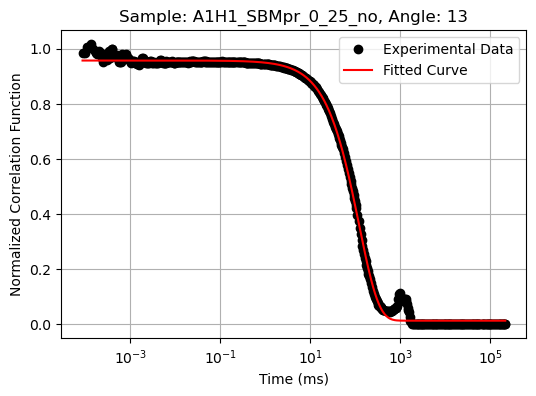

Sample A1H1_SBMpr_0_25_no
Angle 13:
q^2: 8.97273737915286e-06
Β-1: 0.012±0.002, A1: (0±1)×10⁵, Γ1: (0±4)×10¹, A2: (0±1)×10⁵, Γ2: (0±4)×10¹
Diffusion Coefficient 1: 0±5 μm2/ms
Diffusion Coefficient 2: 0±5 μm2/ms
Hydrodynamic Diameter 1: (0±1)×10⁷ nm
Hydrodynamic Diameter 2: (0±1)×10⁷ nm


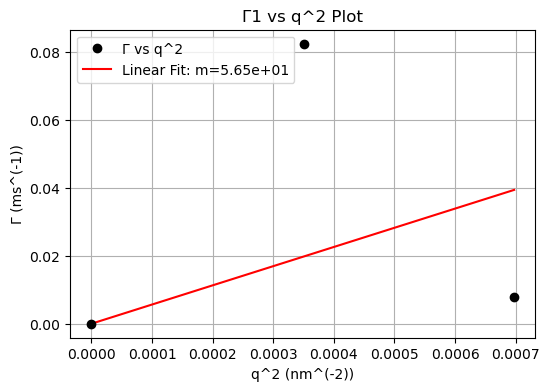

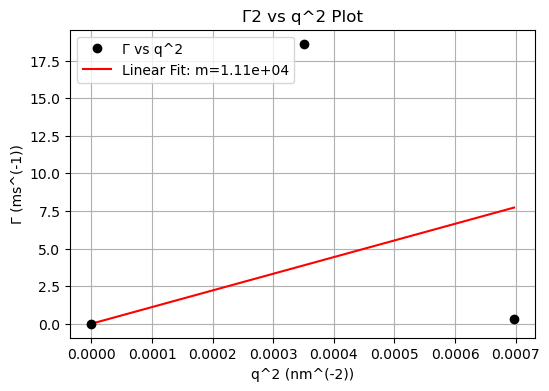


Averaged Results for angles [173, 90]:
Average Diffusion Coefficient 1: 0.000124±0.000001 μm2/ms
Average Diffusion Coefficient 2: 0.027±0.001 μm2/ms
Average Hydrodynamic Diameter 1: (2.3±0.3)×10⁴ nm
Average Hydrodynamic Diameter 2: (5.3±0.3)×10² nm


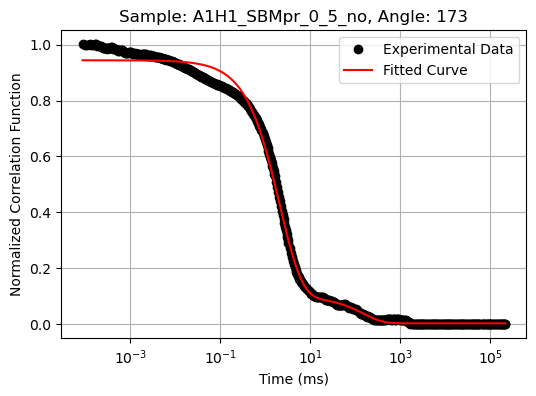

Sample A1H1_SBMpr_0_5_no
Angle 173:
q^2: 0.0006975668562837355
Β-1: 0.003±0.002, A1: 0.308±0.008, Γ1: 0.0033±0.0005, A2: 0.662±0.008, Γ2: 0.310±0.007
Diffusion Coefficient 1: (4.8±0.7)×10⁻⁶ μm2/ms
Diffusion Coefficient 2: 0.00044±0.00001 μm2/ms
Hydrodynamic Diameter 1: (1.0±0.2)×10⁵ nm
Hydrodynamic Diameter 2: (1.11±0.02)×10³ nm


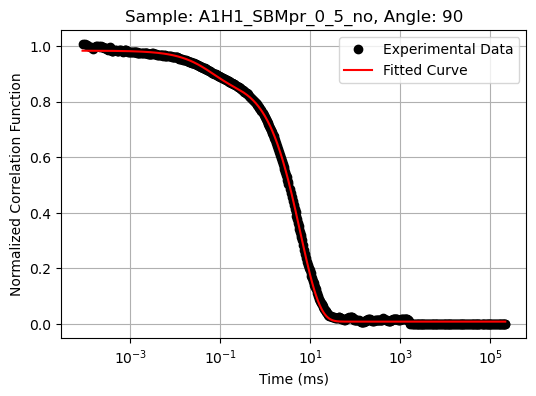

Sample A1H1_SBMpr_0_5_no
Angle 90:
q^2: 0.0003500881802457264
Β-1: 0.0090±0.0006, A1: 0.9324±0.0009, Γ1: 0.0828±0.0005, A2: 0.0544±0.0009, Γ2: 17.1±0.8
Diffusion Coefficient 1: 0.000237±0.000001 μm2/ms
Diffusion Coefficient 2: 0.049±0.002 μm2/ms
Hydrodynamic Diameter 1: (2.08±0.01)×10³ nm
Hydrodynamic Diameter 2: 10.1±0.5 nm


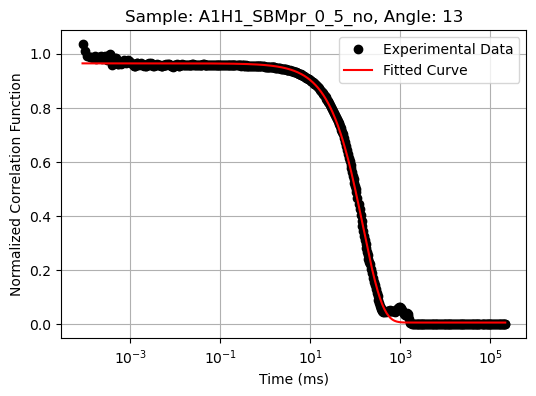

Sample A1H1_SBMpr_0_5_no
Angle 13:
q^2: 8.97273737915286e-06
Β-1: 0.006±0.001, A1: (0±9)×10⁴, Γ1: 0±2, A2: (0±9)×10⁴, Γ2: 0±2
Diffusion Coefficient 1: 0.0±0.2 μm2/ms
Diffusion Coefficient 2: 0.0±0.2 μm2/ms
Hydrodynamic Diameter 1: (0±8)×10⁵ nm
Hydrodynamic Diameter 2: (0±8)×10⁵ nm


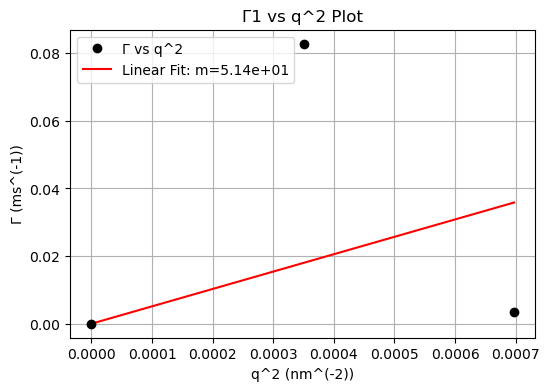

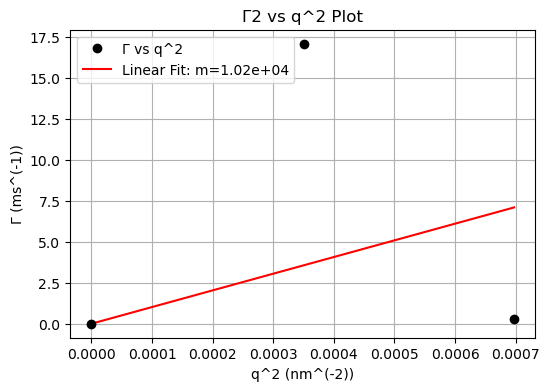


Averaged Results for angles [173, 90]:
Average Diffusion Coefficient 1: 0.0001207±0.0000007 μm2/ms
Average Diffusion Coefficient 2: 0.025±0.001 μm2/ms
Average Hydrodynamic Diameter 1: (5.3±0.8)×10⁴ nm
Average Hydrodynamic Diameter 2: (5.6±0.1)×10² nm


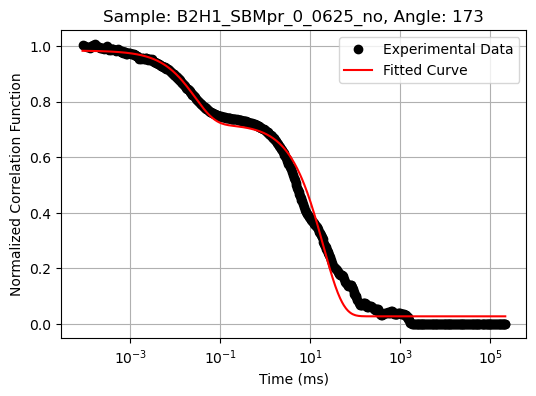

Sample B2H1_SBMpr_0_0625_no
Angle 173:
q^2: 0.0006975668562837355
Β-1: 0.028±0.002, A1: 0.831±0.003, Γ1: 0.0257±0.0006, A2: 0.146±0.003, Γ2: 34±2
Diffusion Coefficient 1: (3.68±0.09)×10⁻⁵ μm2/ms
Diffusion Coefficient 2: 0.049±0.003 μm2/ms
Hydrodynamic Diameter 1: (1.34±0.03)×10⁴ nm
Hydrodynamic Diameter 2: 10.0±0.7 nm


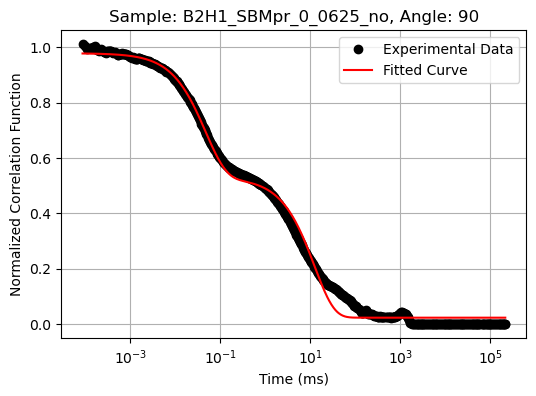

Sample B2H1_SBMpr_0_0625_no
Angle 90:
q^2: 0.0003500881802457264
Β-1: 0.023±0.002, A1: 0.711±0.003, Γ1: 0.040±0.001, A2: 0.266±0.003, Γ2: 18.7±0.6
Diffusion Coefficient 1: 0.000114±0.000003 μm2/ms
Diffusion Coefficient 2: 0.053±0.002 μm2/ms
Hydrodynamic Diameter 1: (4.3±0.1)×10³ nm
Hydrodynamic Diameter 2: 9.2±0.3 nm


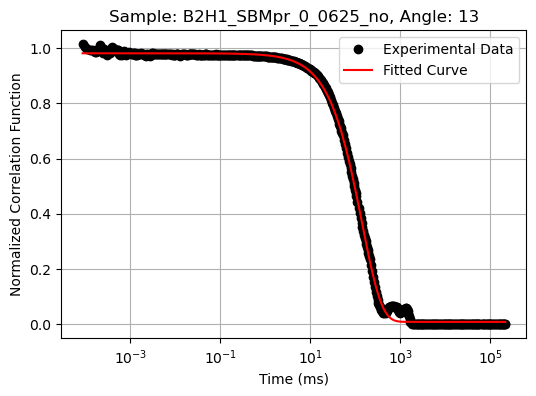

Sample B2H1_SBMpr_0_0625_no
Angle 13:
q^2: 8.97273737915286e-06
Β-1: 0.008±0.001, A1: (0±9)×10⁴, Γ1: 0±3, A2: (0±9)×10⁴, Γ2: 0±3
Diffusion Coefficient 1: 0.0±0.3 μm2/ms
Diffusion Coefficient 2: 0.0±0.3 μm2/ms
Hydrodynamic Diameter 1: (0±9)×10⁵ nm
Hydrodynamic Diameter 2: (0±9)×10⁵ nm


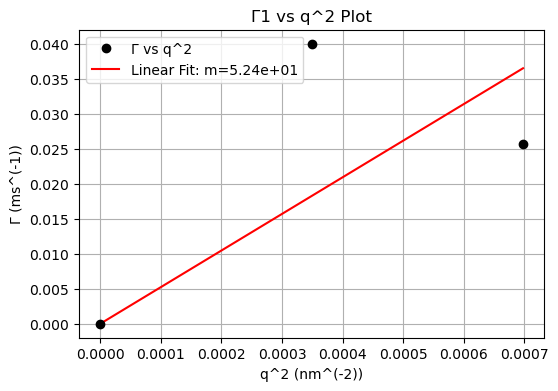

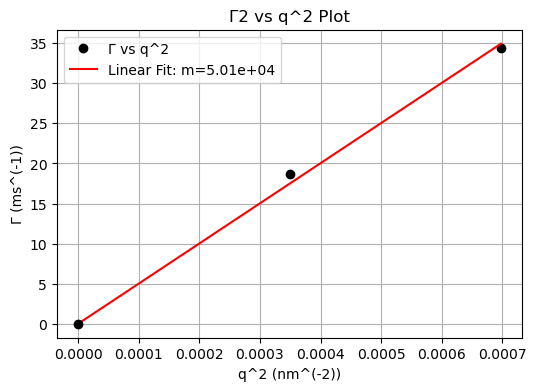


Averaged Results for angles [173, 90]:
Average Diffusion Coefficient 1: (7.6±0.2)×10⁻⁵ μm2/ms
Average Diffusion Coefficient 2: 0.051±0.002 μm2/ms
Average Hydrodynamic Diameter 1: (8.8±0.2)×10³ nm
Average Hydrodynamic Diameter 2: 9.6±0.4 nm


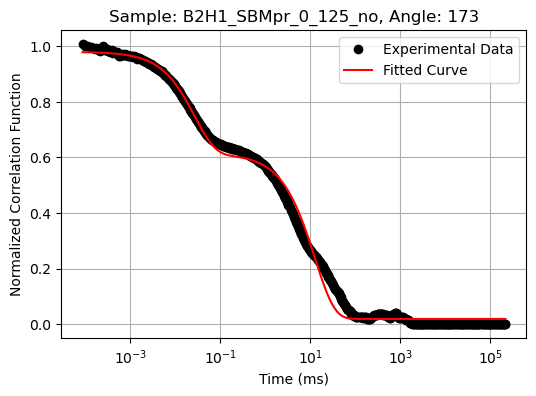

Sample B2H1_SBMpr_0_125_no
Angle 173:
q^2: 0.0006975668562837355
Β-1: 0.019±0.002, A1: 0.771±0.002, Γ1: 0.0393±0.0009, A2: 0.210±0.002, Γ2: 34±1
Diffusion Coefficient 1: (5.6±0.1)×10⁻⁵ μm2/ms
Diffusion Coefficient 2: 0.048±0.002 μm2/ms
Hydrodynamic Diameter 1: (8.7±0.2)×10³ nm
Hydrodynamic Diameter 2: 10.2±0.4 nm


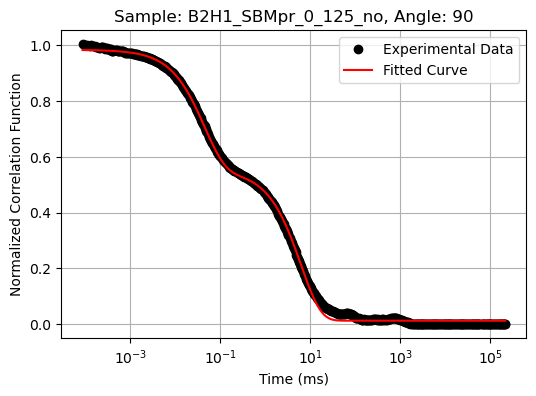

Sample B2H1_SBMpr_0_125_no
Angle 90:
q^2: 0.0003500881802457264
Β-1: 0.0123±0.0008, A1: 0.735±0.001, Γ1: 0.079±0.001, A2: 0.251±0.001, Γ2: 20.1±0.3
Diffusion Coefficient 1: 0.000227±0.000003 μm2/ms
Diffusion Coefficient 2: 0.057±0.001 μm2/ms
Hydrodynamic Diameter 1: (2.17±0.03)×10³ nm
Hydrodynamic Diameter 2: 8.6±0.1 nm


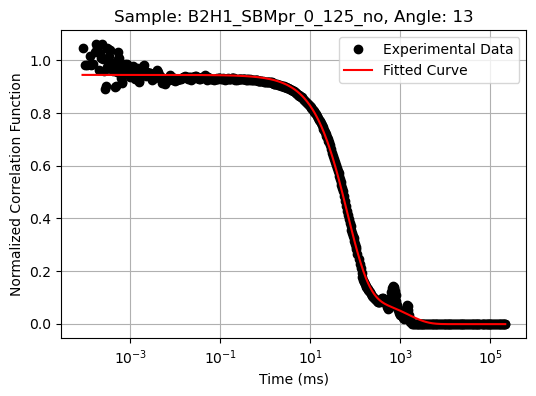

Sample B2H1_SBMpr_0_125_no
Angle 13:
q^2: 8.97273737915286e-06
Β-1: -0.001±0.003, A1: 0.31±0.01, Γ1: 0.00033±0.00006, A2: 0.66±0.01, Γ2: 0.0098±0.0003
Diffusion Coefficient 1: (3.7±0.7)×10⁻⁵ μm2/ms
Diffusion Coefficient 2: 0.00109±0.00003 μm2/ms
Hydrodynamic Diameter 1: (1.3±0.3)×10⁴ nm
Hydrodynamic Diameter 2: (4.5±0.1)×10² nm


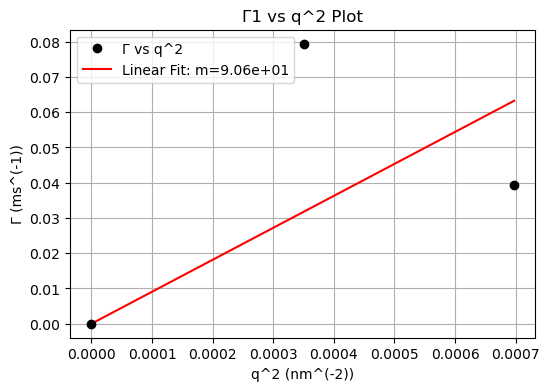

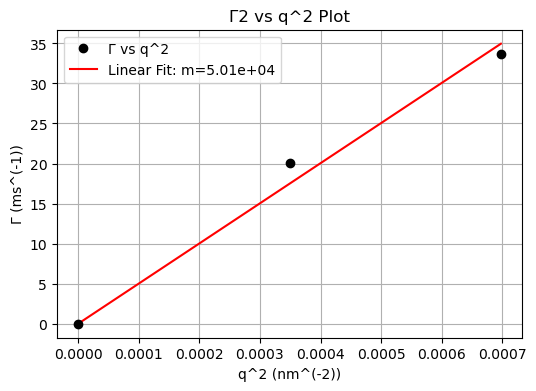


Averaged Results for angles [173, 90]:
Average Diffusion Coefficient 1: 0.000142±0.000001 μm2/ms
Average Diffusion Coefficient 2: 0.053±0.001 μm2/ms
Average Hydrodynamic Diameter 1: (5.5±0.1)×10³ nm
Average Hydrodynamic Diameter 2: 9.4±0.2 nm


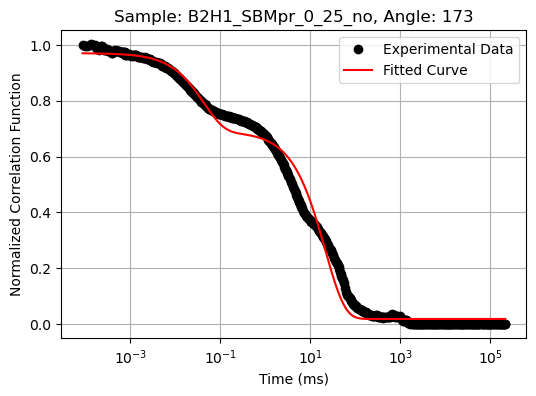

Sample B2H1_SBMpr_0_25_no
Angle 173:
q^2: 0.0006975668562837355
Β-1: 0.019±0.003, A1: 0.820±0.003, Γ1: 0.0232±0.0006, A2: 0.156±0.003, Γ2: 22±2
Diffusion Coefficient 1: (3.33±0.09)×10⁻⁵ μm2/ms
Diffusion Coefficient 2: 0.031±0.002 μm2/ms
Hydrodynamic Diameter 1: (1.48±0.04)×10⁴ nm
Hydrodynamic Diameter 2: 16±1 nm


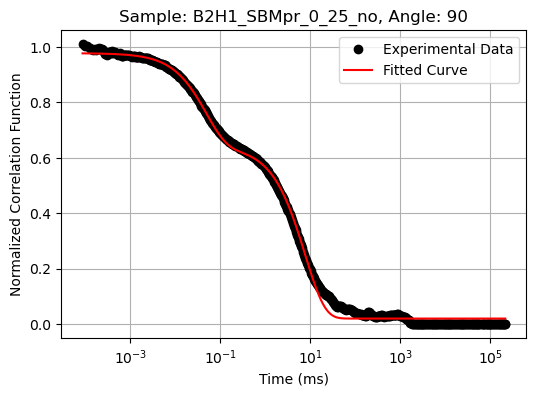

Sample B2H1_SBMpr_0_25_no
Angle 90:
q^2: 0.0003500881802457264
Β-1: 0.020±0.001, A1: 0.789±0.002, Γ1: 0.064±0.001, A2: 0.190±0.002, Γ2: 19.0±0.6
Diffusion Coefficient 1: 0.000184±0.000003 μm2/ms
Diffusion Coefficient 2: 0.054±0.002 μm2/ms
Hydrodynamic Diameter 1: (2.68±0.04)×10³ nm
Hydrodynamic Diameter 2: 9.1±0.3 nm


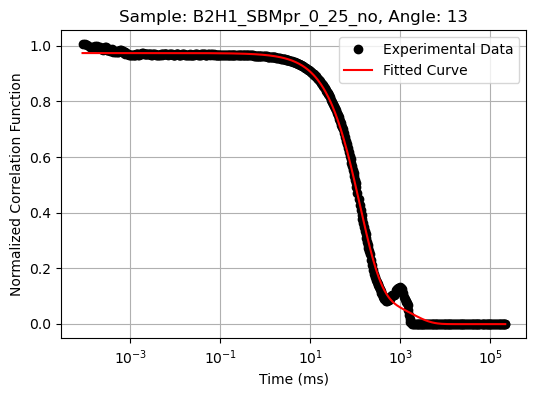

Sample B2H1_SBMpr_0_25_no
Angle 13:
q^2: 8.97273737915286e-06
Β-1: -0.001±0.002, A1: 0.32±0.01, Γ1: 0.00027±0.00004, A2: 0.67±0.01, Γ2: 0.0051±0.0001
Diffusion Coefficient 1: (3.0±0.4)×10⁻⁵ μm2/ms
Diffusion Coefficient 2: 0.00057±0.00001 μm2/ms
Hydrodynamic Diameter 1: (1.6±0.2)×10⁴ nm
Hydrodynamic Diameter 2: (8.6±0.2)×10² nm


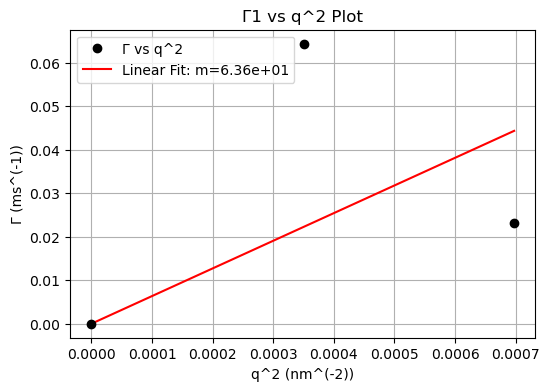

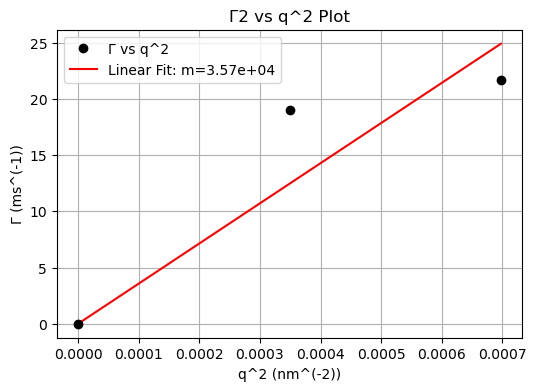


Averaged Results for angles [173, 90]:
Average Diffusion Coefficient 1: 0.000109±0.000002 μm2/ms
Average Diffusion Coefficient 2: 0.043±0.001 μm2/ms
Average Hydrodynamic Diameter 1: (8.7±0.2)×10³ nm
Average Hydrodynamic Diameter 2: 12.5±0.6 nm


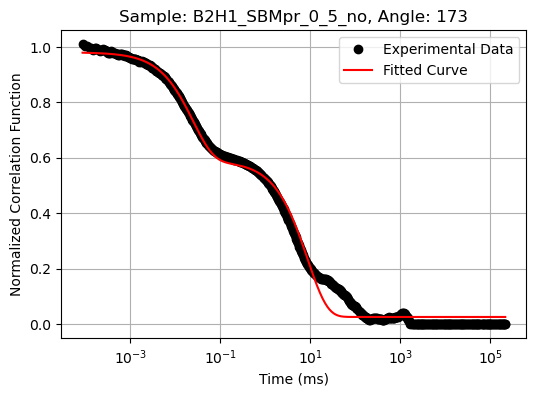

Sample B2H1_SBMpr_0_5_no
Angle 173:
q^2: 0.0006975668562837355
Β-1: 0.026±0.002, A1: 0.750±0.003, Γ1: 0.057±0.002, A2: 0.227±0.003, Γ2: 36±2
Diffusion Coefficient 1: (8.1±0.2)×10⁻⁵ μm2/ms
Diffusion Coefficient 2: 0.052±0.002 μm2/ms
Hydrodynamic Diameter 1: (6.0±0.2)×10³ nm
Hydrodynamic Diameter 2: 9.4±0.4 nm


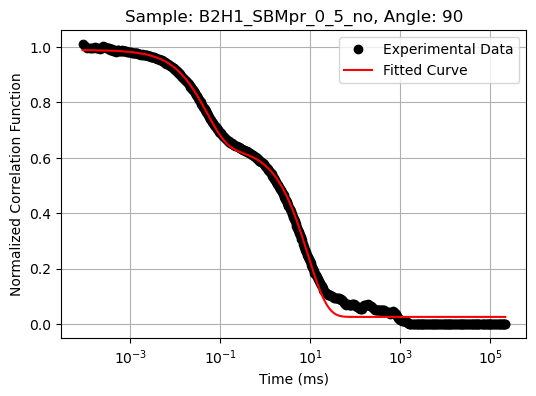

Sample B2H1_SBMpr_0_5_no
Angle 90:
q^2: 0.0003500881802457264
Β-1: 0.026±0.002, A1: 0.782±0.002, Γ1: 0.057±0.001, A2: 0.199±0.002, Γ2: 18.4±0.7
Diffusion Coefficient 1: 0.000162±0.000003 μm2/ms
Diffusion Coefficient 2: 0.053±0.002 μm2/ms
Hydrodynamic Diameter 1: (3.05±0.06)×10³ nm
Hydrodynamic Diameter 2: 9.3±0.4 nm


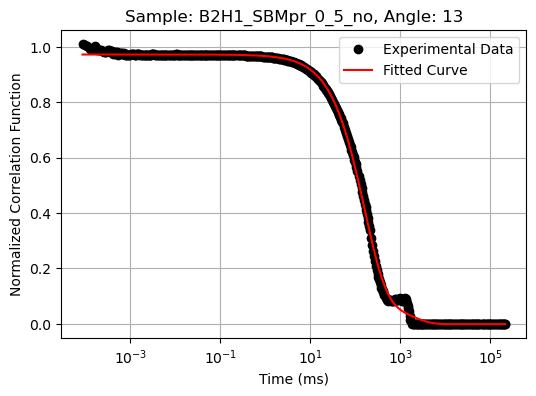

Sample B2H1_SBMpr_0_5_no
Angle 13:
q^2: 8.97273737915286e-06
Β-1: -0.001±0.001, A1: 0.29±0.02, Γ1: 0.00029±0.00005, A2: 0.70±0.02, Γ2: 0.00394±0.00009
Diffusion Coefficient 1: (3.2±0.5)×10⁻⁵ μm2/ms
Diffusion Coefficient 2: 0.00044±0.00001 μm2/ms
Hydrodynamic Diameter 1: (1.5±0.2)×10⁴ nm
Hydrodynamic Diameter 2: (1.12±0.03)×10³ nm


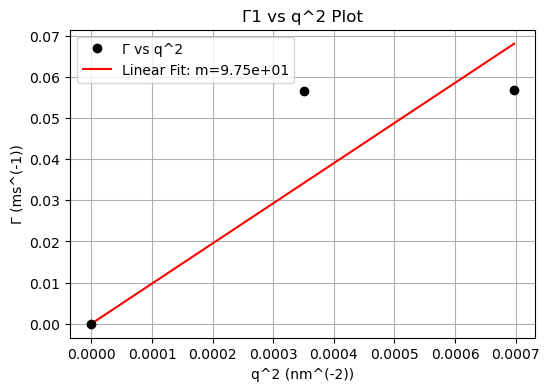

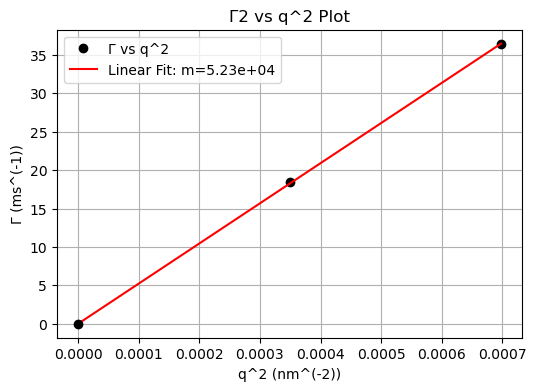


Averaged Results for angles [173, 90]:
Average Diffusion Coefficient 1: 0.000121±0.000002 μm2/ms
Average Diffusion Coefficient 2: 0.052±0.002 μm2/ms
Average Hydrodynamic Diameter 1: (4.55±0.09)×10³ nm
Average Hydrodynamic Diameter 2: 9.4±0.3 nm
{'Sample': 'A1H1_SBMpr_0_0625_no', 'Angle': 173, 'q^2 (Γ1)': 0.0006975668562837355, 'q^2 (Γ2)': 0.0006975668562837355, 'B-1': 0.026686153341356506, 'Δ(B-1)': 0.00203391567880972, 'A1': 0.7776697533180946, 'Δ(A1)': 0.0030203198649177334, 'Γ1': 0.09183389221683647, 'Δ(Γ1)': 0.002403045948805429, 'A2': 0.20127570739645742, 'Δ(A2)': 0.0032003770590879493, 'Γ2': 39.236571464807696, 'Δ(Γ2)': 1.966872315488127, 'Diffusion Coefficient 1': 0.00013164887550145158, 'Δ(Diffusion Coefficient 1)': 3.444896968883495e-06, 'Diffusion Coefficient 2': 0.056247757632636446, 'Δ(Diffusion Coefficient 2)': 0.002819618360262376, 'Hydrodynamic Diameter 1': 3738.4188703336295, 'Δ(Hydrodynamic Diameter 1)': 97.82436641236013, 'Hydrodynamic Diameter 2': 8.74983574718125, 

In [27]:
## Dynamic Light Scattering ##

## Data Analysis Process (Version 2.1) ##

## Empa, Center for X-ray Analytics, D.Sapalidis, St. Gallen, Switzerland, 06.07.2024 ##

## Part IV:Fitting of the DLS data ##

import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties.umath import *

# Define function to normalize Y-axis
def normalize_y(df):
    for col in df.columns[1::2]:  # Every second column starting from index 1
        mean_first_six = df[col].iloc[:6].mean()
        df[col] = df[col] / mean_first_six
    return df

# Define function to convert X-axis to milliseconds
def convert_to_milliseconds(df):
    for col in df.columns[::2]:  # Every second column starting from index 0
        df[col] = df[col] / 1000
    return df

# Define Cumulants fitting function
def cumulantDLS(xdata, a, b, c, d):
    return a + b * (np.exp(-c * xdata) * (1 + 0.5 * d * xdata**2))**2  # Alastair G. Mailer et al 2015 J. Phys.: Condens. Matter 27 145102 - Equation 13

# Define Biexponential fitting function
def biexponential(xdata, e, f, g, h, i):
    return e + (f * np.exp(-g * xdata) + h * np.exp(-i * xdata))**2

# Diffusion coefficient
def calculate_diffusion_coefficient_and_uncertainty(x2, x2_err, angle):
    q_sq = (((4 * np.pi * refr_Index / lambda_val) * np.sin((angle * np.pi / 180) / 2))**2)  # q_square in nm^(-1)
    diff_coeff = 10**(-6) * x2 / q_sq  # diffusion coefficient in  μm^(2) / ms
    diff_coeff_err = 10**(-6) * x2_err / q_sq
    return diff_coeff, diff_coeff_err, q_sq

# Hydrodynamic diameter
def calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff, diff_coeff_err):
    d_h = (10**9 * 10**9 * k_Boltzman * Temp_K) / (3 * np.pi * viscosity * diff_coeff)  # d_h in nm
    d_h_err = (10**9 * 10**9 * k_Boltzman * Temp_K) / (3 * np.pi * viscosity) * (diff_coeff_err / diff_coeff**2)
    return d_h, d_h_err

# Format numbers with uncertainties to one significant digit
def format_with_uncertainty(value, error):
    u_val = ufloat(value, error)
    return f"{u_val:.1uP}"

# Print results
def print_results(results_list):
    for result in results_list:
        print(result)
        print()

# Fitting of the data
def process_dls_file(file_path, angles, angle_values, angles_for_average, fitmodel):
    results_list = []
    
    df = pd.read_csv(file_path, delimiter=',', header=0, nrows=None)
    
    df_normalized = normalize_y(df)
    
    df_normalized_ms = convert_to_milliseconds(df_normalized)
    
    # Initialize arrays to store fitting results
    F_fit = np.zeros((angles, len(df_normalized)))
    X_fit = np.zeros((angles, len(df_normalized), 5 if fitmodel == 2 else 4))
    Residuals = np.zeros((angles, len(df_normalized)))
    Errors = np.zeros((angles, 5 if fitmodel == 2 else 4))  # To store uncertainties
    
    # Initialize lists to store results for selected angles
    diff_coeff1_list = []
    diff_coeff1_err_list = []
    diff_coeff2_list = []
    diff_coeff2_err_list = []
    d_h1_list = []
    d_h1_err_list = []
    d_h2_list = []
    d_h2_err_list = []
    
    gamma1_values = []
    gamma2_values = []
    q_square_values1 = []
    q_square_values2 = []
    
    sample_name = os.path.basename(file_path).replace("_dataset.txt", "")
    
    # Perform fitting for each angle
    for idx in range(angles):
        xdata = df_normalized_ms.iloc[:, 2 * idx].values
        ydata = df_normalized_ms.iloc[:, 2 * idx + 1].values
        
        if fitmodel == 1:
            # Cumulants fitting
            x0_g = [0.0, 1.0, 1.0, 0.1]  # Initial guesses for fitting parameters
            boundaries = ([-0.2, 0.0, 0.0, 0.0], [0.2, 1.0, np.inf, 1.0])  # Limits for the parameters
            x, cov = curve_fit(cumulantDLS, xdata, ydata, p0=x0_g, bounds=boundaries)
            errors = np.sqrt(np.diag(cov))
            F_fit[idx] = cumulantDLS(xdata, *x)
            
        elif fitmodel == 2:
            # Biexponential fitting
            x0_g = [0.0, 0.5, 1.0, 0.5, 1.0]  # Initial guesses for fitting parameters
            boundaries = ([-0.2, 0.0, 0.0, 0.0, 0.0], [0.2, 1.0, np.inf, 1.0, np.inf])  # Limits for the parameters
            x, cov = curve_fit(biexponential, xdata, ydata, p0=x0_g, bounds=boundaries)
            errors = np.sqrt(np.diag(cov))
            F_fit[idx] = biexponential(xdata, *x)
            
            # Ensure Γ2 > Γ1
            if x[4] <= x[2]:
                x[2], x[4] = x[4], x[2]
                x[1], x[3] = x[3], x[1]
                errors[2], errors[4] = errors[4], errors[2]
                errors[1], errors[3] = errors[3], errors[1]

        Residuals[idx] = ydata - F_fit[idx]
        X_fit[idx] = x
        Errors[idx] = errors
        chi_square = np.sum(((ydata - F_fit[idx]) ** 2) / F_fit[idx])
        reduced_chi_square = chi_square / (len(ydata) - len(x))
        
        if fitmodel == 1:
            # Calculate diffusion coefficient for cumulants
            diff_coeff, diff_coeff_err, q_sq = calculate_diffusion_coefficient_and_uncertainty(x[2], errors[2], angle_values[idx])
            gamma1_values.append(x[2])
            q_square_values1.append(q_sq)
            hydrodynamic_diameter, hydrodynamic_diameter_err = calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff, diff_coeff_err)
            
            # Store results if the angle is in the angles_for_average list
            if angle_values[idx] in angles_for_average:
                diff_coeff1_list.append(ufloat(diff_coeff, diff_coeff_err))
                d_h1_list.append(ufloat(hydrodynamic_diameter, hydrodynamic_diameter_err))
            
            results_list.append({
                "Sample": os.path.basename(file_path).replace("_dataset.txt", ""),
                "Angle": angle_values[idx],
                "q^2": q_sq,
                "B-1": x[0],
                "Δ(Β-1)": errors[0],
                "β": x[1],
                "Δ(β)": errors[1],
                "Γ": x[2],
                "Δ(Γ)": errors[2],
                "PDI": x[3] / (x[2]**2),
                "Δ(PDI)": errors[3] / (x[2]**2),
                "Diffusion Coefficient": diff_coeff,
                "Δ(Diffusion Coefficient)": diff_coeff_err,
                "Hydrodynamic Diameter": hydrodynamic_diameter,
                "Δ(Hydrodynamic Diameter)": hydrodynamic_diameter_err,
                "χ^2": chi_square,
                "Reduced χ^2": reduced_chi_square
            })
            
        elif fitmodel == 2:
            # Calculate diffusion coefficients for biexponential
            diff_coeff1, diff_coeff1_err, q_sq1 = calculate_diffusion_coefficient_and_uncertainty(x[2], errors[2], angle_values[idx])
            diff_coeff2, diff_coeff2_err, q_sq2 = calculate_diffusion_coefficient_and_uncertainty(x[4], errors[4], angle_values[idx])
            gamma1_values.append(x[2])
            gamma2_values.append(x[4])
            q_square_values1.append(q_sq1)
            q_square_values2.append(q_sq2)
            hydrodynamic_diameter1, hydrodynamic_diameter1_err = calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff1, diff_coeff1_err)
            hydrodynamic_diameter2, hydrodynamic_diameter2_err = calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff2, diff_coeff2_err)
            
            # Store results if the angle is in the angles_for_average list
            if angle_values[idx] in angles_for_average:
                diff_coeff1_list.append(ufloat(diff_coeff1, diff_coeff1_err))
                diff_coeff2_list.append(ufloat(diff_coeff2, diff_coeff2_err))
                d_h1_list.append(ufloat(hydrodynamic_diameter1, hydrodynamic_diameter1_err))
                d_h2_list.append(ufloat(hydrodynamic_diameter2, hydrodynamic_diameter2_err))
            
            results_list.append({
                "Sample": os.path.basename(file_path).replace("_dataset.txt", ""),
                "Angle": angle_values[idx],
                "q^2 (Γ1)": q_sq1,
                "q^2 (Γ2)": q_sq2,
                "B-1": x[0],
                "Δ(B-1)": errors[0],
                "A1": x[1],
                "Δ(A1)": errors[1],
                "Γ1": x[2],
                "Δ(Γ1)": errors[2],
                "A2": x[3],
                "Δ(A2)": errors[3],
                "Γ2": x[4],
                "Δ(Γ2)": errors[4],
                "Diffusion Coefficient 1": diff_coeff1,
                "Δ(Diffusion Coefficient 1)": diff_coeff1_err,
                "Diffusion Coefficient 2": diff_coeff2,
                "Δ(Diffusion Coefficient 2)": diff_coeff2_err,
                "Hydrodynamic Diameter 1": hydrodynamic_diameter1,
                "Δ(Hydrodynamic Diameter 1)": hydrodynamic_diameter1_err,
                "Hydrodynamic Diameter 2": hydrodynamic_diameter2,
                "Δ(Hydrodynamic Diameter 2)": hydrodynamic_diameter2_err,
                "χ^2": chi_square,
                "Reduced χ^2": reduced_chi_square
            })
        
        # Plot experimental and fitted curves
        plt.figure(figsize=(6, 4))
        plt.semilogx(xdata, ydata, 'ko', label='Experimental Data')
        plt.semilogx(xdata, F_fit[idx], 'r-', label='Fitted Curve')
        plt.title(f'Sample: {os.path.basename(file_path).replace("_dataset.txt", "")}, Angle: {angle_values[idx]}')
        plt.xlabel('Time (ms)')
        plt.ylabel('Normalized Correlation Function')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Print fitting parameters with uncertainties
        print(f'Sample {os.path.basename(file_path).replace("_dataset.txt", "")}')
        print(f"Angle {angle_values[idx]}:")
        print(f"q^2: {q_sq1 if fitmodel == 2 else q_sq}")
        
        if fitmodel == 1:
            print(f"Β-1: {format_with_uncertainty(x[0], errors[0])}, β: {format_with_uncertainty(x[1], errors[1])}, Γ: {format_with_uncertainty(x[2], errors[2])}, PDI: {format_with_uncertainty(x[3] / (x[2]**2), errors[3] / (x[2]**2))}")
            print(f"Diffusion Coefficient: {format_with_uncertainty(diff_coeff, diff_coeff_err)} μm2/ms")
            print(f"Hydrodynamic Diameter: {format_with_uncertainty(hydrodynamic_diameter, hydrodynamic_diameter_err)} nm")
        elif fitmodel == 2:
            print(f"Β-1: {format_with_uncertainty(x[0], errors[0])}, A1: {format_with_uncertainty(x[1], errors[1])}, Γ1: {format_with_uncertainty(x[2], errors[2])}, A2: {format_with_uncertainty(x[3], errors[3])}, Γ2: {format_with_uncertainty(x[4], errors[4])}")
            print(f"Diffusion Coefficient 1: {format_with_uncertainty(diff_coeff1, diff_coeff1_err)} μm2/ms")
            print(f"Diffusion Coefficient 2: {format_with_uncertainty(diff_coeff2, diff_coeff2_err)} μm2/ms")
            print(f"Hydrodynamic Diameter 1: {format_with_uncertainty(hydrodynamic_diameter1, hydrodynamic_diameter1_err)} nm")
            print(f"Hydrodynamic Diameter 2: {format_with_uncertainty(hydrodynamic_diameter2, hydrodynamic_diameter2_err)} nm")
    
    # Plot Γ1 vs q^2 for selected angles
    if diff_coeff1_list and d_h1_list:
        plot_gamma_vs_q_square(gamma1_values, q_square_values1, angles_for_average, 'Γ1 vs q^2 Plot')
    
    # Plot Γ2 vs q^2 for selected angles if model 2
    if fitmodel == 2 and diff_coeff2_list and d_h2_list:
        plot_gamma_vs_q_square(gamma2_values, q_square_values2, angles_for_average, 'Γ2 vs q^2 Plot')
    
    # Calculate averages
    if diff_coeff1_list and d_h1_list and (fitmodel == 1 or diff_coeff2_list):
        avg_diff_coeff1 = np.mean(diff_coeff1_list)
        avg_diff_coeff2 = np.mean(diff_coeff2_list) if diff_coeff2_list else None
        avg_d_h1 = np.mean(d_h1_list)
        avg_d_h2 = np.mean(d_h2_list) if d_h2_list else None
        
        print(f"\nAveraged Results for angles {angles_for_average}:")
        print(f"Average Diffusion Coefficient 1: {avg_diff_coeff1:.1uP} μm2/ms")
        if avg_diff_coeff2:
            print(f"Average Diffusion Coefficient 2: {avg_diff_coeff2:.1uP} μm2/ms")
        print(f"Average Hydrodynamic Diameter 1: {avg_d_h1:.1uP} nm")
        if avg_d_h2:
            print(f"Average Hydrodynamic Diameter 2: {avg_d_h2:.1uP} nm")
    
    return results_list, F_fit, X_fit, Residuals, Errors, gamma1_values, gamma2_values, q_square_values1, q_square_values2

# Plot Γ vs q^2 with linear fitting passing through (0,0)
def plot_gamma_vs_q_square(gamma_values, q_square_values, angles_for_average, plot_title):
    
    angles_indices = [angle_values.index(angle) for angle in angles_for_average]
    q_square_values_selected = np.array([q_square_values[idx] for idx in angles_indices])
    gamma_values_selected = np.array([gamma_values[idx] for idx in angles_indices])
    
    def linear_fit_through_origin(x, m):
        return m * x
    
    popt, _ = curve_fit(linear_fit_through_origin, q_square_values_selected, gamma_values_selected)
    
    # Plot data and linear fit 
    plt.figure(figsize=(6, 4))
    plt.plot(q_square_values_selected, gamma_values_selected, 'ko', label='Γ vs q^2')
    
    # Calculate the y-values of the linear fit at q^2 = 0 and q^2 = max(q_square_values_selected)
    y_fit_at_zero = linear_fit_through_origin(0, *popt)
    y_fit_at_max = linear_fit_through_origin(max(q_square_values_selected), *popt)

    plt.plot([0, max(q_square_values_selected)], [y_fit_at_zero, y_fit_at_max], 'r-', label=f'Linear Fit: m={popt[0]:.2e}')  # Linear fit through (0,0)
    plt.plot([0], [0], 'ko')  # Plot (0,0) point 
    
    plt.xlabel('q^2 (nm^(-2))')
    plt.ylabel('Γ (ms^(-1))')
    plt.title(plot_title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Save the data

# Conversion of Greek characters to English
greek_to_english = {
    "\u0393": "Gamma",
    "\u0394": "Delta",
    "\u03b2": "Beta",
    "\u03c7": "Chi"
}

def convert_greek_to_english(results_list):
    converted_results = []
    for entry in results_list:
        converted_entry = {}
        for key, value in entry.items():
            converted_key = "".join(greek_to_english.get(char, char) for char in key)
            converted_entry[converted_key] = value
        converted_results.append(converted_entry)
    return converted_results

# Save fitting data to file
def save_fitting_data_to_file(input_folder, sample_name, angle, xdata, ydata, F_fit, residuals):
    output_file = f"{sample_name}_angle_{angle}_output_fit.txt"
    with open(output_file, 'w') as f:
        f.write("Time (ms),Experimental g(2)-1,Fitting g(2)-1,Residuals\n")
        for t, y_exp, y_fit, res in zip(xdata, ydata, F_fit, residuals):
            f.write(f"{t},{y_exp},{y_fit},{res}\n")
            
def save_results_to_dat(results_list, output_file):
    converted_results = convert_greek_to_english(results_list)
    if not converted_results:
        print("No results to save.")
        return
    
    # Extract headers
    headers = list(converted_results[0].keys())
    
    with open(output_file, 'w', encoding='utf-8') as f:
        # Write headers
        f.write(",".join(headers) + "\n")
        
        # Write data
        for entry in converted_results:
            values = [str(entry[header]) for header in headers]
            f.write(",".join(values) + "\n")

# Processing of all files in the folder
def process_plots_folder(folder_path, angles, angle_values, angles_for_average, fitmodel):
    results_list = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('_dataset.txt'):
            file_path = os.path.join(folder_path, file_name)
            results, _, _, _, _, gamma1_values, gamma2_values, q_square_values1, q_square_values2 = process_dls_file(file_path, angles, angle_values, angles_for_average, fitmodel)
            results_list.extend(results)
    
    output_file = "DLS_Fitting_Data_Output.dat"
    save_results_to_dat(results_list, output_file)
    print_results(results_list)  

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# User-defined parameters
angles = 3  # angle number
angle_values = [173, 90, 13]  # angle values
lambda_val = 633  # source wavelength in nm
refr_Index = 1.3329  # solvent refractive index
k_Boltzman = 1.38065e-23  # J*K ^ (-1)
temperature = 25  # in Celsius
viscosity = 0.887e-3  # in Pa*s  (water at 25 oC)
Temp_K = temperature + 273
fitmodel = 2  # 1: Cumulants non-linear (size, PDI), 2: Biexponential (size 1, size 2)
angles_for_average = [173, 90]  # angles for averaging
save_fitting_data = "yes" # (yes/no) save the experimental correlation function [g(2)-1] with the fitting curve for each sample and angle

input_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting\UCNPs_SBM_pr_Fitting_DLS\no_SBM_pr"

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

input_folder = pathlib.PureWindowsPath(input_folder).as_posix()

process_plots_folder(input_folder, angles, angle_values, angles_for_average, fitmodel)
